## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import bostonDataset
import network
import dataset
import sanityChecks
import performanceMetrics
import torch 
from torch.utils.data import random_split 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 1


## Dataset - Boston Housing 

In [5]:
#Parameters 
n_features = 13
n_samples= 506
n_target = 1 

In [6]:
X,Y = bostonDataset.boston_data()

        X1    X2    X3   X4     X5     X6    X7      X8   X9    X10   X11  \
0  0.00632  18.0  2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3   
1  0.02731   0.0  7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8   
2  0.02729   0.0  7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8   
3  0.03237   0.0  2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0  18.7   
4  0.06905   0.0  2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0  18.7   

      X12   X13     Y  
0  396.90  4.98  24.0  
1  396.90  9.14  21.6  
2  392.83  4.03  34.7  
3  394.63  2.94  33.4  
4  396.90  5.33  36.2  


In [7]:
#Train test split for dataset 
real_dataset = dataset.CustomDataset(X,Y)
train_size = round(0.8 * n_samples)
test_size = n_samples - train_size
train_data, test_data = random_split(real_dataset,[train_size,test_size])

## Training Parameters 



In [8]:
batch_size = 100
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

### MSE Threshold and Mean Coeff Values 

1. Fetch MSE threshold for training the ABC-GAN 
2. The ABC-GAN will be trained until the threshold MSE is achieved or until it completes 5000 epochs 
3. The threshold mse is the mean mse of Catboost over 10 runs

In [9]:
books = sb.read_notebooks('./BaseLine_Model_Output')
catboostMSE = []
for nb in books.notebooks: 
    catboostMSE.append(nb.scraps['Catboost MSE'].data)
    
#Threshold MSE     
threshold_mse = mean(catboostMSE)

print(threshold_mse)

0.10094117185431159


# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [10]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X,Y)

Learning rate set to 0.034573
0:	learn: 0.9806058	total: 57.6ms	remaining: 57.5s
1:	learn: 0.9606716	total: 58.5ms	remaining: 29.2s
2:	learn: 0.9390920	total: 59.5ms	remaining: 19.8s
3:	learn: 0.9209237	total: 60.5ms	remaining: 15.1s
4:	learn: 0.9046978	total: 61.6ms	remaining: 12.3s
5:	learn: 0.8896854	total: 62.7ms	remaining: 10.4s
6:	learn: 0.8724151	total: 63.8ms	remaining: 9.04s
7:	learn: 0.8558633	total: 64.7ms	remaining: 8.03s
8:	learn: 0.8400199	total: 65.6ms	remaining: 7.22s
9:	learn: 0.8229065	total: 66.4ms	remaining: 6.58s
10:	learn: 0.8057776	total: 67.1ms	remaining: 6.04s
11:	learn: 0.7907426	total: 68ms	remaining: 5.59s
12:	learn: 0.7753485	total: 68.8ms	remaining: 5.22s
13:	learn: 0.7601130	total: 69.6ms	remaining: 4.9s
14:	learn: 0.7475256	total: 70.4ms	remaining: 4.63s
15:	learn: 0.7326054	total: 71.2ms	remaining: 4.38s
16:	learn: 0.7206853	total: 72.3ms	remaining: 4.18s
17:	learn: 0.7077303	total: 73.2ms	remaining: 4s
18:	learn: 0.6955287	total: 74ms	remaining: 3.82s


104:	learn: 0.3013455	total: 149ms	remaining: 1.27s
105:	learn: 0.2996238	total: 150ms	remaining: 1.27s
106:	learn: 0.2980370	total: 151ms	remaining: 1.26s
107:	learn: 0.2965967	total: 152ms	remaining: 1.26s
108:	learn: 0.2951864	total: 153ms	remaining: 1.25s
109:	learn: 0.2942861	total: 154ms	remaining: 1.24s
110:	learn: 0.2932928	total: 156ms	remaining: 1.25s
111:	learn: 0.2916150	total: 157ms	remaining: 1.24s
112:	learn: 0.2903158	total: 157ms	remaining: 1.24s
113:	learn: 0.2893044	total: 158ms	remaining: 1.23s
114:	learn: 0.2880453	total: 159ms	remaining: 1.22s
115:	learn: 0.2868924	total: 160ms	remaining: 1.22s
116:	learn: 0.2854905	total: 161ms	remaining: 1.21s
117:	learn: 0.2838426	total: 162ms	remaining: 1.21s
118:	learn: 0.2827228	total: 163ms	remaining: 1.21s
119:	learn: 0.2820207	total: 164ms	remaining: 1.2s
120:	learn: 0.2807575	total: 165ms	remaining: 1.2s
121:	learn: 0.2800950	total: 166ms	remaining: 1.19s
122:	learn: 0.2793606	total: 166ms	remaining: 1.19s
123:	learn: 0.

153:	learn: 0.2507161	total: 192ms	remaining: 1.05s
154:	learn: 0.2497802	total: 193ms	remaining: 1.05s
155:	learn: 0.2490613	total: 194ms	remaining: 1.05s
156:	learn: 0.2484356	total: 194ms	remaining: 1.04s
157:	learn: 0.2475208	total: 195ms	remaining: 1.04s
158:	learn: 0.2467460	total: 196ms	remaining: 1.04s
159:	learn: 0.2461317	total: 197ms	remaining: 1.03s
160:	learn: 0.2456028	total: 198ms	remaining: 1.03s
161:	learn: 0.2449256	total: 199ms	remaining: 1.03s
162:	learn: 0.2444113	total: 200ms	remaining: 1.02s
163:	learn: 0.2438126	total: 200ms	remaining: 1.02s
164:	learn: 0.2432080	total: 201ms	remaining: 1.02s
165:	learn: 0.2425986	total: 202ms	remaining: 1.02s
166:	learn: 0.2421108	total: 203ms	remaining: 1.01s
167:	learn: 0.2413956	total: 204ms	remaining: 1.01s
168:	learn: 0.2407630	total: 205ms	remaining: 1.01s
169:	learn: 0.2401529	total: 206ms	remaining: 1s
170:	learn: 0.2391465	total: 207ms	remaining: 1s
171:	learn: 0.2383087	total: 207ms	remaining: 998ms
172:	learn: 0.2377

320:	learn: 0.1703284	total: 340ms	remaining: 719ms
321:	learn: 0.1700544	total: 341ms	remaining: 718ms
322:	learn: 0.1696955	total: 342ms	remaining: 716ms
323:	learn: 0.1695203	total: 342ms	remaining: 715ms
324:	learn: 0.1693707	total: 343ms	remaining: 713ms
325:	learn: 0.1690932	total: 344ms	remaining: 712ms
326:	learn: 0.1687871	total: 345ms	remaining: 711ms
327:	learn: 0.1684932	total: 346ms	remaining: 709ms
328:	learn: 0.1680740	total: 347ms	remaining: 708ms
329:	learn: 0.1676495	total: 348ms	remaining: 706ms
330:	learn: 0.1672606	total: 349ms	remaining: 705ms
331:	learn: 0.1669891	total: 350ms	remaining: 703ms
332:	learn: 0.1666284	total: 350ms	remaining: 702ms
333:	learn: 0.1664670	total: 351ms	remaining: 701ms
334:	learn: 0.1660441	total: 352ms	remaining: 699ms
335:	learn: 0.1657088	total: 353ms	remaining: 698ms
336:	learn: 0.1653987	total: 354ms	remaining: 696ms
337:	learn: 0.1652355	total: 355ms	remaining: 695ms
338:	learn: 0.1648615	total: 356ms	remaining: 694ms
339:	learn: 

368:	learn: 0.1572274	total: 382ms	remaining: 654ms
369:	learn: 0.1568606	total: 383ms	remaining: 653ms
370:	learn: 0.1564609	total: 384ms	remaining: 651ms
371:	learn: 0.1560608	total: 385ms	remaining: 650ms
372:	learn: 0.1558547	total: 386ms	remaining: 648ms
373:	learn: 0.1555605	total: 387ms	remaining: 647ms
374:	learn: 0.1552292	total: 387ms	remaining: 646ms
375:	learn: 0.1549435	total: 388ms	remaining: 644ms
376:	learn: 0.1546544	total: 389ms	remaining: 643ms
377:	learn: 0.1543066	total: 390ms	remaining: 642ms
378:	learn: 0.1540311	total: 391ms	remaining: 640ms
379:	learn: 0.1536233	total: 392ms	remaining: 639ms
380:	learn: 0.1533239	total: 393ms	remaining: 638ms
381:	learn: 0.1530299	total: 393ms	remaining: 636ms
382:	learn: 0.1528336	total: 394ms	remaining: 635ms
383:	learn: 0.1526162	total: 395ms	remaining: 634ms
384:	learn: 0.1523426	total: 396ms	remaining: 632ms
385:	learn: 0.1521042	total: 397ms	remaining: 631ms
386:	learn: 0.1518990	total: 398ms	remaining: 630ms
387:	learn: 

538:	learn: 0.1221160	total: 530ms	remaining: 454ms
539:	learn: 0.1219316	total: 531ms	remaining: 452ms
540:	learn: 0.1217415	total: 532ms	remaining: 451ms
541:	learn: 0.1214753	total: 533ms	remaining: 450ms
542:	learn: 0.1212860	total: 534ms	remaining: 449ms
543:	learn: 0.1211131	total: 535ms	remaining: 448ms
544:	learn: 0.1208536	total: 535ms	remaining: 447ms
545:	learn: 0.1207734	total: 536ms	remaining: 446ms
546:	learn: 0.1205887	total: 537ms	remaining: 445ms
547:	learn: 0.1203470	total: 538ms	remaining: 444ms
548:	learn: 0.1201638	total: 539ms	remaining: 443ms
549:	learn: 0.1200067	total: 540ms	remaining: 442ms
550:	learn: 0.1198272	total: 540ms	remaining: 440ms
551:	learn: 0.1195666	total: 541ms	remaining: 439ms
552:	learn: 0.1194183	total: 542ms	remaining: 438ms
553:	learn: 0.1191881	total: 543ms	remaining: 437ms
554:	learn: 0.1189026	total: 544ms	remaining: 436ms
555:	learn: 0.1187021	total: 545ms	remaining: 435ms
556:	learn: 0.1185118	total: 546ms	remaining: 434ms
557:	learn: 

585:	learn: 0.1137566	total: 573ms	remaining: 405ms
586:	learn: 0.1135706	total: 574ms	remaining: 404ms
587:	learn: 0.1134748	total: 575ms	remaining: 403ms
588:	learn: 0.1134371	total: 576ms	remaining: 402ms
589:	learn: 0.1131994	total: 577ms	remaining: 401ms
590:	learn: 0.1130597	total: 578ms	remaining: 400ms
591:	learn: 0.1128132	total: 579ms	remaining: 399ms
592:	learn: 0.1126699	total: 580ms	remaining: 398ms
593:	learn: 0.1125247	total: 581ms	remaining: 397ms
594:	learn: 0.1123135	total: 582ms	remaining: 396ms
595:	learn: 0.1120719	total: 583ms	remaining: 395ms
596:	learn: 0.1118641	total: 584ms	remaining: 394ms
597:	learn: 0.1116640	total: 585ms	remaining: 393ms
598:	learn: 0.1114721	total: 585ms	remaining: 392ms
599:	learn: 0.1113192	total: 586ms	remaining: 391ms
600:	learn: 0.1111923	total: 587ms	remaining: 390ms
601:	learn: 0.1109718	total: 588ms	remaining: 389ms
602:	learn: 0.1108705	total: 589ms	remaining: 388ms
603:	learn: 0.1106417	total: 590ms	remaining: 387ms
604:	learn: 

754:	learn: 0.0908138	total: 721ms	remaining: 234ms
755:	learn: 0.0907134	total: 722ms	remaining: 233ms
756:	learn: 0.0906398	total: 723ms	remaining: 232ms
757:	learn: 0.0905546	total: 724ms	remaining: 231ms
758:	learn: 0.0904137	total: 725ms	remaining: 230ms
759:	learn: 0.0903441	total: 726ms	remaining: 229ms
760:	learn: 0.0902583	total: 726ms	remaining: 228ms
761:	learn: 0.0901566	total: 727ms	remaining: 227ms
762:	learn: 0.0900882	total: 728ms	remaining: 226ms
763:	learn: 0.0899894	total: 729ms	remaining: 225ms
764:	learn: 0.0898732	total: 733ms	remaining: 225ms
765:	learn: 0.0897384	total: 734ms	remaining: 224ms
766:	learn: 0.0896966	total: 734ms	remaining: 223ms
767:	learn: 0.0895544	total: 735ms	remaining: 222ms
768:	learn: 0.0893441	total: 736ms	remaining: 221ms
769:	learn: 0.0891873	total: 737ms	remaining: 220ms
770:	learn: 0.0890086	total: 738ms	remaining: 219ms
771:	learn: 0.0888501	total: 739ms	remaining: 218ms
772:	learn: 0.0886622	total: 740ms	remaining: 217ms
773:	learn: 

798:	learn: 0.0860072	total: 764ms	remaining: 192ms
799:	learn: 0.0859006	total: 765ms	remaining: 191ms
800:	learn: 0.0858199	total: 766ms	remaining: 190ms
801:	learn: 0.0856808	total: 767ms	remaining: 189ms
802:	learn: 0.0855259	total: 768ms	remaining: 188ms
803:	learn: 0.0854329	total: 769ms	remaining: 187ms
804:	learn: 0.0853917	total: 770ms	remaining: 186ms
805:	learn: 0.0852416	total: 771ms	remaining: 186ms
806:	learn: 0.0851578	total: 772ms	remaining: 185ms
807:	learn: 0.0850396	total: 773ms	remaining: 184ms
808:	learn: 0.0848606	total: 773ms	remaining: 183ms
809:	learn: 0.0847896	total: 774ms	remaining: 182ms
810:	learn: 0.0847359	total: 775ms	remaining: 181ms
811:	learn: 0.0846284	total: 776ms	remaining: 180ms
812:	learn: 0.0845465	total: 777ms	remaining: 179ms
813:	learn: 0.0844637	total: 778ms	remaining: 178ms
814:	learn: 0.0842755	total: 779ms	remaining: 177ms
815:	learn: 0.0841571	total: 779ms	remaining: 176ms
816:	learn: 0.0840457	total: 780ms	remaining: 175ms
817:	learn: 

959:	learn: 0.0716285	total: 913ms	remaining: 38ms
960:	learn: 0.0716086	total: 914ms	remaining: 37.1ms
961:	learn: 0.0715439	total: 915ms	remaining: 36.1ms
962:	learn: 0.0714557	total: 916ms	remaining: 35.2ms
963:	learn: 0.0713766	total: 917ms	remaining: 34.2ms
964:	learn: 0.0713120	total: 918ms	remaining: 33.3ms
965:	learn: 0.0712524	total: 918ms	remaining: 32.3ms
966:	learn: 0.0711092	total: 919ms	remaining: 31.4ms
967:	learn: 0.0710991	total: 920ms	remaining: 30.4ms
968:	learn: 0.0709569	total: 921ms	remaining: 29.5ms
969:	learn: 0.0708275	total: 922ms	remaining: 28.5ms
970:	learn: 0.0707121	total: 923ms	remaining: 27.6ms
971:	learn: 0.0706513	total: 924ms	remaining: 26.6ms
972:	learn: 0.0705804	total: 926ms	remaining: 25.7ms
973:	learn: 0.0705152	total: 926ms	remaining: 24.7ms
974:	learn: 0.0704742	total: 927ms	remaining: 23.8ms
975:	learn: 0.0704049	total: 928ms	remaining: 22.8ms
976:	learn: 0.0703682	total: 929ms	remaining: 21.9ms
977:	learn: 0.0703054	total: 930ms	remaining: 20

# ABC GAN Model

### Training the network
**Training ABC-GAN for n_epochs number of epochs** 

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.01, betas=(0.5, 0.999))

In [12]:
#Training the ABC_GAN 
discLossA1,genLossA1 = ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)
sb.glue("ABC_GAN_1 Generator Loss",genLossA1)
sb.glue("ABC_GAN_1 Discriminator Loss",discLossA1)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.15869978394441223


#### Sanity Checks 

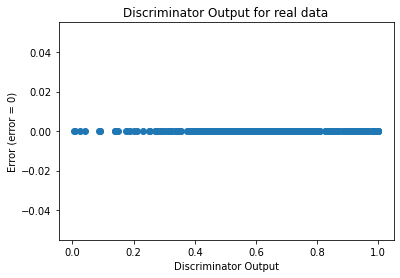

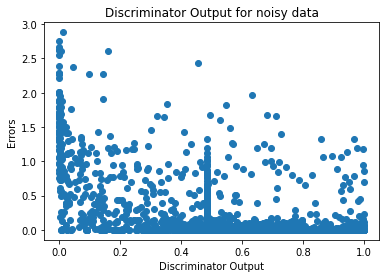

In [14]:
sanityChecks.discProbVsError(real_dataset,disc,device)

**Training ABC-GAN until mse of y_pred is > baseline_mse or n_epochs < 5000**

In [15]:
gen2 = network.Generator(n_features+1).to(device)
disc2 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen2.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc2.parameters(), lr=0.01, betas=(0.5, 0.999))

In [16]:
discLossA2,genLossA2 = ABC_train_test2.training_GAN_2(disc2,gen2,disc_opt,gen_opt,train_data,test_data,batch_size,threshold_mse,criterion,prior_model,variance,device)
sb.glue("ABC_GAN_2 Generator Loss",genLossA2)
sb.glue("ABC_GAN_2 Discriminator Loss",discLossA2)

Number of epochs 295


In [17]:
ABC_GAN2_metrics=ABC_train_test2.test_generator(gen2,test_data,prior_model,variance,"2",device)
sb.glue("ABC_GAN_2 Metrics",ABC_GAN2_metrics)

print("MSE")
print(mean(ABC_GAN2_metrics[0]))

MSE
0.1222071121234226


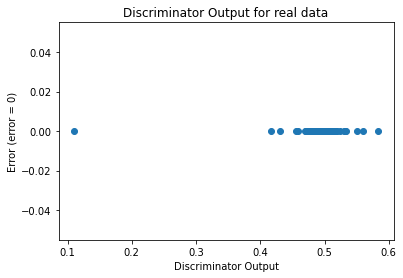

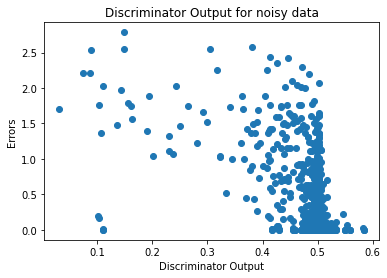

In [18]:
sanityChecks.discProbVsError(real_dataset,disc2,device)

# ABC - GAN Model with skip connection

In [19]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.01, betas=(0.5, 0.999))


In [20]:
discLossA3,genLossA3 = ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)
sb.glue("ABC_GAN_3 Generator Loss",genLossA3)
sb.glue("ABC_GAN_3 Discriminator Loss",discLossA3)

In [21]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.15256394384728053


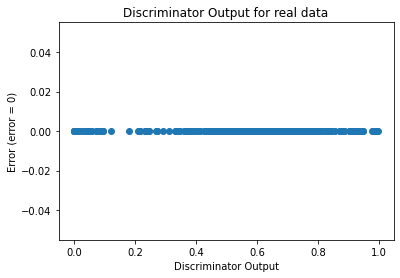

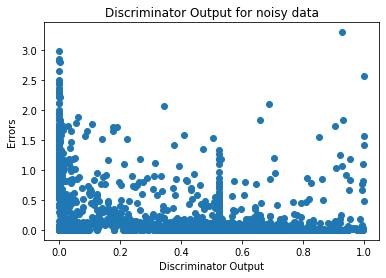

In [22]:
sanityChecks.discProbVsError(real_dataset,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [23]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.7478]], requires_grad=True)
